In [8]:
## K-Means Clustering from Scratch
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [78]:
class KMeans:
    def __init__(self, n_clusters=4, max_iter=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centriods = None
        self.labels_ = None

    def fit(self,X):
        n_samples, n_features = X.shape
        #Step 1: Randomly Initialize the Centriods
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iter):
            # Step 1: Calculate distances from each point to each centroid
            clusters = []
            # Iterate over each point in the dataset
            # For each point, calculate the distance to each centroid and assign it to the nearest one
            for x in X:
                distances = np.linalg.norm(x - self.centroids, axis=1)
                cluster = np.argmin(distances)
                clusters.append(cluster)
            clusters = np.array(clusters)
            #clusters shape = (n_samples,)
            
            # Step 2: Update centroids
            old_centriods = self.centroids.copy()

            # Iterate over each cluster and calculate the mean of the points assigned to it
            for k in range(self.n_clusters):  
                cluster_points = X[clusters == k]  
                if len(cluster_points) > 0:  
                    self.centroids[k] = cluster_points.mean(axis=0)  
                else:  
                    # If a cluster has no points, keep the old centroid  
                    self.centroids[k] = self.centroids[k]  

        self.labels_ = self.centriods
     
    def predict(self,X):
        clusters = []  # Initialize an empty list to store cluster assignments  
        for x in X:  
            distances = np.linalg.norm(x - self.centroids, axis=1)  # Calculate distances to all centroids  
            cluster = np.argmin(distances)  # Find the closest centroid  
            clusters.append(cluster)  # Append the index of the closest centroid  
        return np.array(clusters)

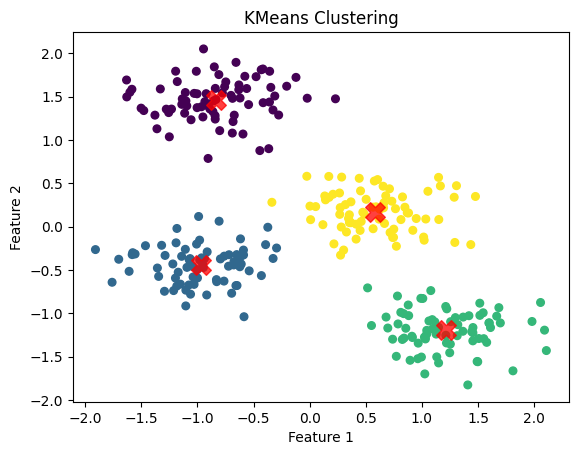

In [79]:
# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X = StandardScaler().fit_transform(X)

k_means = KMeans(n_clusters=4, max_iter=300, tol=1e-4)
k_means.fit(X)
y_pred = k_means.predict(X)

#Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=30, cmap='viridis')
centers = k_means.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [97]:
## Creating the Datasets
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [103]:
class KMeans:
    def __init__(self, n_clusters, max_iter=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.n_centroids = None
        self.labels = None
        self.tol = tol

    def fit(self,X):
        ## Retrieve the dimension
        n_samples, n_features = X.shape

        ## Initialize the random centriods
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        
        for i in range(self.max_iter):
            ## Calculate the distances for each data point of X, and assign the cluster to the minimum
            clusters = []
            for x in X:
                distances = np.linalg.norm(self.centroids - x, axis=1)
                cluster = np.argmin(distances)
                clusters.append(cluster)
            clusters = np.array(clusters)

            old_centroids = self.centroids.copy()
            
            for k in range(self.n_clusters):
                cluster_points = X[clusters == k] 
                
                if len(cluster_points) > 0:  
                    self.centroids[k] =  cluster_points.mean(axis=0)
                else:  
                    # Handle case where a cluster is empty (can happen in some scenarios)  
                    # One approach is to keep the old centroid or reinitialize it randomly  
                    self.centroids[k] = centroids[i] # Keeping the old centroid here  

            ##Check for the Convergence
            if np.all(np.linalg.norm(self.centroids - old_centroids, axis=1) < self.tol):
                break

        self.labels = self.centroids

    def predict(self,X):
        ## Calculate the distances for each data point of X, and assign the cluster to the minimum
        clusters = []
        for x in X:
            distances = np.linalg.norm(self.centroids - x, axis=1)
            cluster = np.argmin(distances)
            clusters.append(cluster)
        return np.array(clusters)

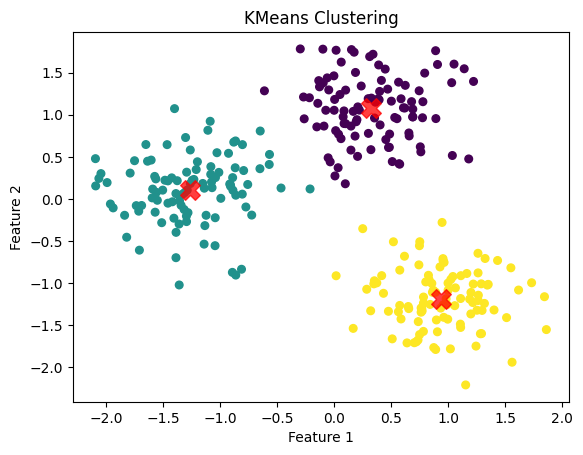

In [104]:
# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
X = StandardScaler().fit_transform(X)

k_means = KMeans(n_clusters=3, max_iter=300, tol=1e-4)
k_means.fit(X)
y_pred = k_means.predict(X)

#Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=30, cmap='viridis')
centers = k_means.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [76]:
import numpy as np  

X = np.array([[0, 1], [2, 1], [3, 2], [3, 0], [1, 0]])  # x1, y1  
centroids = np.array([[0, 1], [3, 0]])  # x2 y2  

def euclidean_distance(point1, point2):  
    """Calculates the Euclidean distance between two points."""  
    return np.sqrt(np.sum((point1 - point2) ** 2))  

def assign_to_clusters(X, centroids):  
    """Assigns each data point to the nearest centroid using Euclidean distance."""  
    clusters = []  
    for x in X:  
        distances = [euclidean_distance(x, c) for c in centroids]  
        cluster = np.argmin(distances)  
        clusters.append(cluster)  
    return np.array(clusters)  

def update_centroids(X, clusters, n_clusters):  
    """Updates the centroids based on the mean of the data points in each cluster."""  
    new_centroids = np.zeros((n_clusters, X.shape[1]))  
    for i in range(n_clusters):  
        points_in_cluster = X[clusters == i]  
        if len(points_in_cluster) > 0:  
            new_centroids[i] = np.mean(points_in_cluster, axis=0)  
        else:  
            # Handle case where a cluster is empty (can happen in some scenarios)  
            # One approach is to keep the old centroid or reinitialize it randomly  
            new_centroids[i] = centroids[i] # Keeping the old centroid here  
    return new_centroids  

In [77]:
# K-Means Algorithm  
n_clusters = len(centroids)  
max_iterations = 100  
tolerance = 1e-4 # For convergence check  

previous_clusters = None  

for iteration in range(max_iterations):  
    print(f"\nIteration {iteration + 1}")  
    clusters = assign_to_clusters(X, centroids)  

    print("Current clusters:", clusters)  

    # Check for convergence  
    if previous_clusters is not None and np.array_equal(clusters, previous_clusters):  
        print("Convergence achieved.")  
        break  

    new_centroids = update_centroids(X, clusters, n_clusters)  

    # Another convergence check based on centroid movement  
    centroid_movement = np.sum((new_centroids - centroids) ** 2)  
    if centroid_movement < tolerance:  
        print("Convergence achieved (small centroid movement).")  
        break  

    centroids = new_centroids  
    previous_clusters = clusters  

print("\nFinal Centroids:\n", centroids)  
print("Final Clusters:", clusters)  


Iteration 1
Current clusters: [0 1 1 1 0]

Iteration 2
Current clusters: [0 1 1 1 0]
Convergence achieved.

Final Centroids:
 [[0.5        0.5       ]
 [2.66666667 1.        ]]
Final Clusters: [0 1 1 1 0]


In [144]:
import torch
from torch import nn
import torch.nn.functional as F

class MyNeuralNet(nn.Module):
    def __init__(self,input_dimension,output_dimension):
        super(MyNeuralNet,self).__init__()
        ## Input Dimension - Example Values (X1, x2) - [1,2[, [3,4]
        #1st Hidden Layer
        self.fc1 = nn.Linear(input_dimension, 100)
        # Second hidden layer (connecting to a larger intermediate layer)  
        self.fc2 = nn.Linear(100, 200)
        # Third hidden layer  
        self.fc3 = nn.Linear(200, 100) 
        ## Output Layer
        self.fc4 = nn.Linear(100,output_dimension)
        self.dropout = nn.Dropout(p=0.2)
    
    ## Forward Function
    def forward(self,X):
        x = self.fc1(X)
        x = F.relu(x)
        
        x = self.fc2(x)
        x = F.relu(x)

        x = self.fc3(x)  
        x = F.relu(x)
        
        x = self.fc4(x)
        
        return x
        

X = torch.tensor([[1,2],[3,4],[5,6],[7,8],[9,10],[10,11],[4,7],[3,8]],dtype=torch.float32)
y = torch.tensor([[3],[7],[11],[15],[19],[21],[11],[11]],dtype=torch.float32)

#Input Variables
# X = torch.rand(100,2)
# y = torch.rand(100).view(-1,1)

input_size = 2
output_size = 1

model = MyNeuralNet(input_dimension=input_size, 
                    output_dimension=output_size)

n_epochs = 500
criterian = nn.L1Loss()
optimizer = torch.optim.Adam(params = model.parameters(), lr=0.01)

for epoch in range(n_epochs):
    model.train()
    
    outputs = model(X)
    loss = criterian(outputs, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch%10==0:
        print(f'Epoch {epoch + 1}/{n_epochs}, Loss: {round(loss.item(),2)}')

Epoch 1/500, Loss: 12.25
Epoch 11/500, Loss: 1.73
Epoch 21/500, Loss: 2.62
Epoch 31/500, Loss: 0.12
Epoch 41/500, Loss: 0.16
Epoch 51/500, Loss: 0.39
Epoch 61/500, Loss: 0.34
Epoch 71/500, Loss: 1.13
Epoch 81/500, Loss: 0.09
Epoch 91/500, Loss: 0.95
Epoch 101/500, Loss: 0.14
Epoch 111/500, Loss: 1.02
Epoch 121/500, Loss: 0.65
Epoch 131/500, Loss: 0.56
Epoch 141/500, Loss: 0.26
Epoch 151/500, Loss: 0.73
Epoch 161/500, Loss: 0.8
Epoch 171/500, Loss: 1.5
Epoch 181/500, Loss: 0.84
Epoch 191/500, Loss: 0.12
Epoch 201/500, Loss: 1.77
Epoch 211/500, Loss: 0.39
Epoch 221/500, Loss: 0.51
Epoch 231/500, Loss: 1.02
Epoch 241/500, Loss: 1.74
Epoch 251/500, Loss: 0.31
Epoch 261/500, Loss: 0.44
Epoch 271/500, Loss: 1.21
Epoch 281/500, Loss: 0.06
Epoch 291/500, Loss: 2.24
Epoch 301/500, Loss: 0.66
Epoch 311/500, Loss: 1.38
Epoch 321/500, Loss: 1.01
Epoch 331/500, Loss: 0.65
Epoch 341/500, Loss: 0.46
Epoch 351/500, Loss: 0.52
Epoch 361/500, Loss: 0.14
Epoch 371/500, Loss: 0.51
Epoch 381/500, Loss: 0.8

### Predicting For a New Sample

In [145]:
x_test = torch.tensor([[5,6]], dtype=torch.float32)

model.eval()
with torch.no_grad():
    prediction = model(x_test)

print(prediction)

tensor([[11.6567]])
